# Station characterisation

In this notebook, bicycle counting stations are characterised based on their temporal traffic patterns. The aim is to distinguish stations dominated by work-related (utilitarian) traffic from those primarily used for leisure, while explicitly allowing for intermediate cases.

We define three usage types:

- Leisure: relatively high weekend traffic, weak weekend drop, strong seasonal variation

- Utilitarian: pronounced weekday double peaks, strong weekend drop, weak seasonal variation

- Mixed: a combination of leisure and utilitarian characteristics

Important: These patterns are not strict rules but guiding assumptions. For example, a leisure station may still exhibit weekday double peaks due to commuter traffic. Such behaviour is not contradictory if other dominant properties justify its classification as leisure.

In [1]:
from data_io.loader.data_loader import DataLoader

dl = DataLoader()


import polars as pl

pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

polars.config.Config

## Indices
To compare station behaviour across different temporal scales, we use normalized indices on hourly, daily, and monthly levels. Normalisation ensures that stations with different absolute traffic volumes remain comparable.
To showcase the output of each Indice we will use a arbitrary station of Heidelberg.

In [2]:
station = "Plöck"

**Daily Mean Count**

The daily mean count $\bar{C}_{24h}$ is defined as the total daily traffic divided by the number of observed days.

In [3]:
from analysis.visualization.characterisation.indices import daily_mean_count

daily_mean_count(loader=dl, station_name=station)

4162.984692375626

**Hourly index**

The hourly index measures the relative traffic intensity of each hour compared to the daily mean:

$$
\begin{align*}
I_{h} = \frac{\bar{C}_{1h}}{\bar{C}_{24h}}
\end{align*}
$$

This highlights typical diurnal patterns, such as low night-time counts and increased traffic during morning and evening hours.

In [4]:
from analysis.visualization.characterisation.indices import hourly_index

hourly_index(loader=dl, station_name=station, channel="channels_all")

hour,mean_C_1h,I_h
i8,f64,f64
0,19.635799,0.004717
1,12.87841,0.003094
2,8.225902,0.001976
3,7.407572,0.001779
4,17.312722,0.004159
5,60.570964,0.01455
6,150.585452,0.036172
7,210.256357,0.050506
8,233.648521,0.056125


**Daily Index**

The daily index captures day-to-day variability, normalised by the overall daily mean:

$$
\begin{align*}
I_{d} = \frac{\bar{C}_{1d}}{\bar{C}_{24h}}
\end{align*}
$$

In [5]:
from analysis.visualization.characterisation.indices import daily_index

daily_index(loader=dl, station_name=station, channel="channels_all")

weekday,mean_C_1d,I_d
i8,f64,f64
1,4482.865979,1.076839
2,4881.88843,1.172689
3,4858.45679,1.167061
4,4822.639175,1.158457
5,4378.455487,1.051759
6,3534.366255,0.848998
7,2196.616803,0.527654


**Monthly Index**

The monthly index reflects seasonal variation by comparing average monthly traffic to the daily mean:
$$
\begin{align*}
I_{m} = \frac{\bar{C}_{30d}}{\bar{C}_{24h}}
\end{align*}
$$

In [6]:
from analysis.visualization.characterisation.indices import monthly_index

monthly_index(loader=dl, station_name=station, channel="channels_all")

month,mean_C_1d,I_m
i8,f64,f64
1,3398.643333,0.816396
2,3559.731801,0.855091
3,3320.696113,0.797672
4,4080.695205,0.980233
5,4742.863799,1.139294
6,5097.948148,1.22459
7,5590.229391,1.342842
8,3678.856631,0.883706
9,3847.32963,0.924176


## Exploratory Plots

Before clustering, we visually explore the temporal patterns of all stations using normalized indices.

**Hourly Indices**

The aggregated hourly indices illustrate a clear contrast between weekdays and weekends on average: weekdays exhibit a pronounced double-peak structure, while weekend profiles are flatter and more evenly distributed. However, the semi-transparent individual curves already indicate substantial variability across stations.

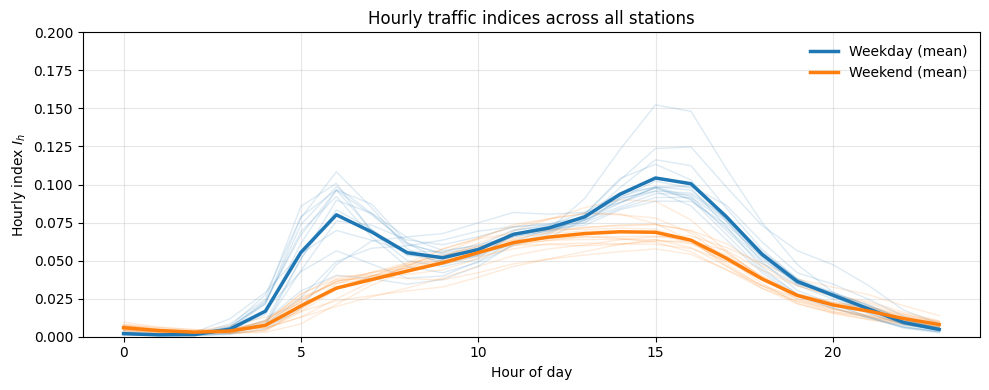

In [7]:
from analysis.visualization.characterisation.plotting import plot_hourly_indices_all

plot_hourly_indices_all(dl)


We next inspect hourly profiles on a per-station basis. These plots reveal that several stations deviate from the canonical utilitarian or leisure patterns. Examples include stations with a single dominant peak, shifted peak times, or only minor differences between weekday and weekend profiles.

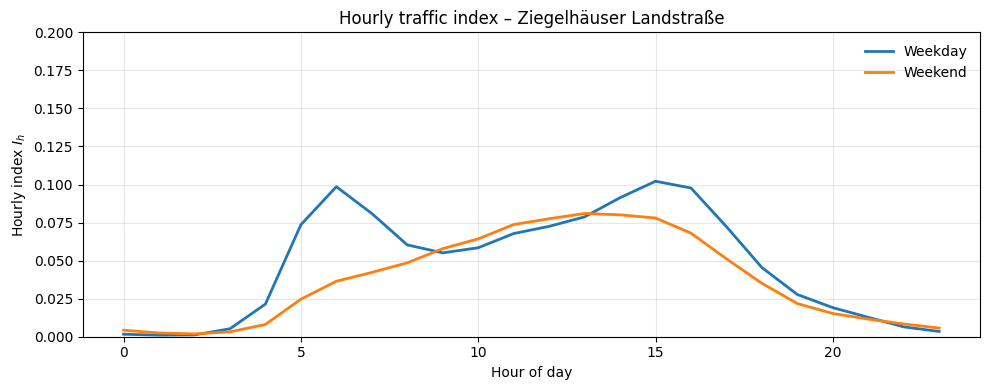

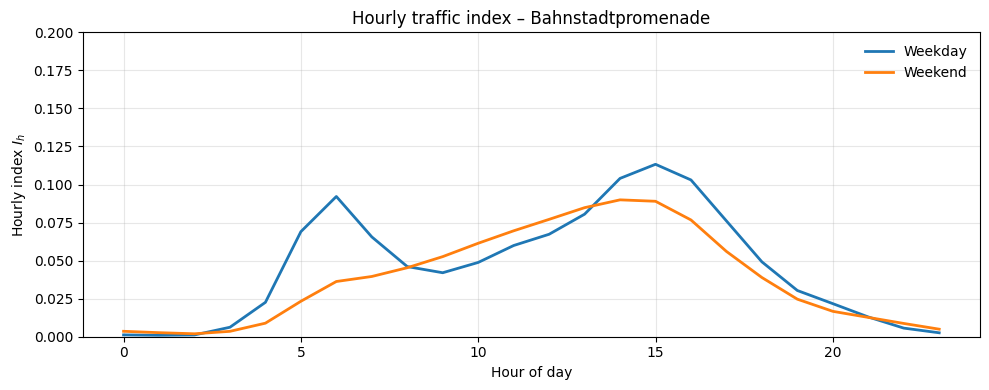

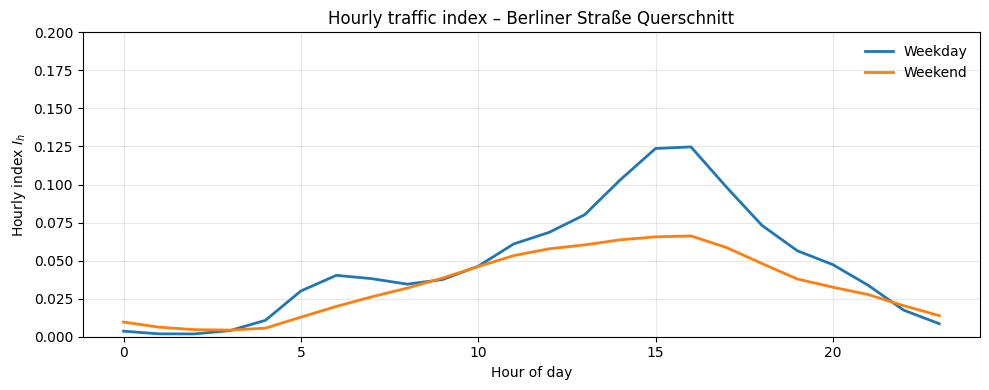

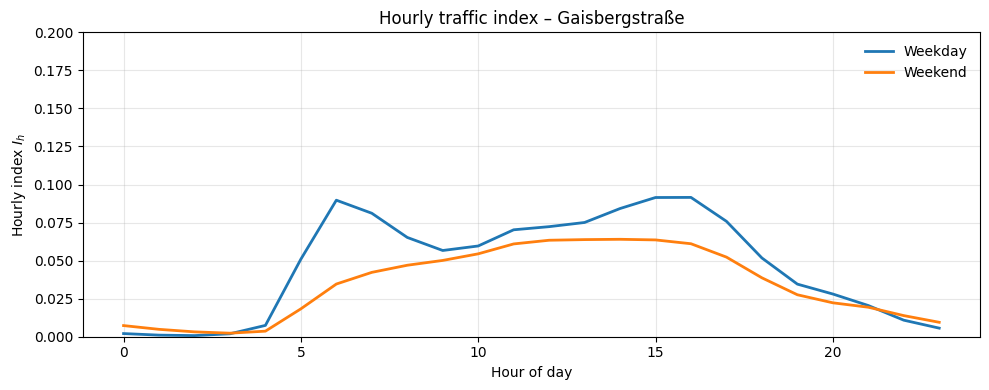

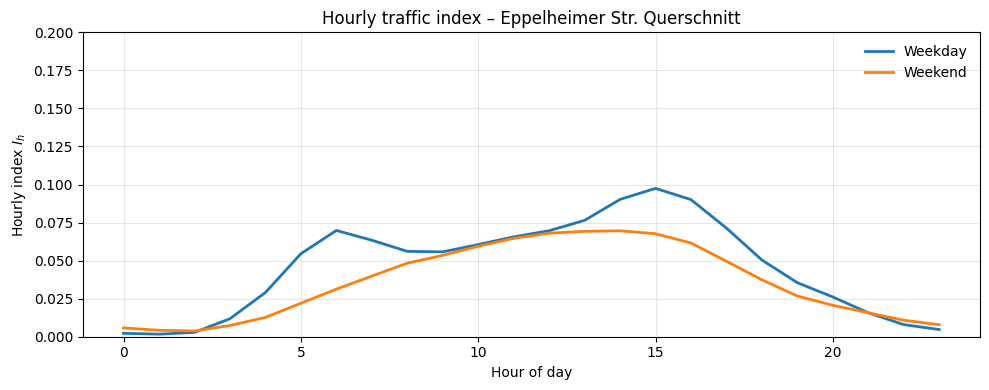

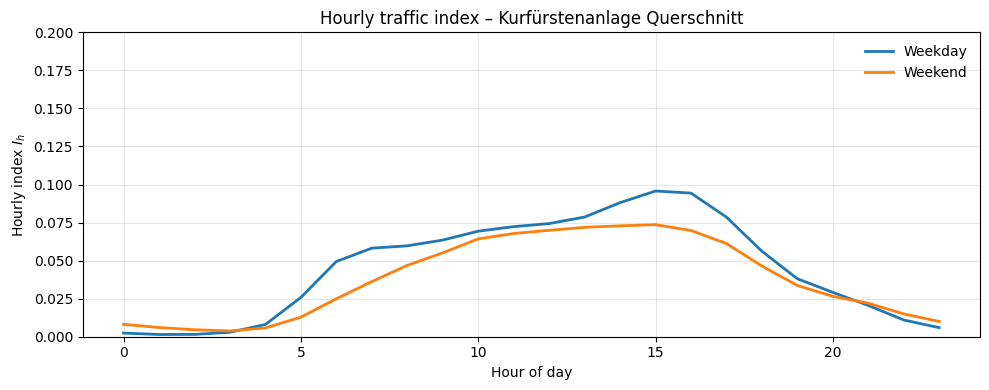

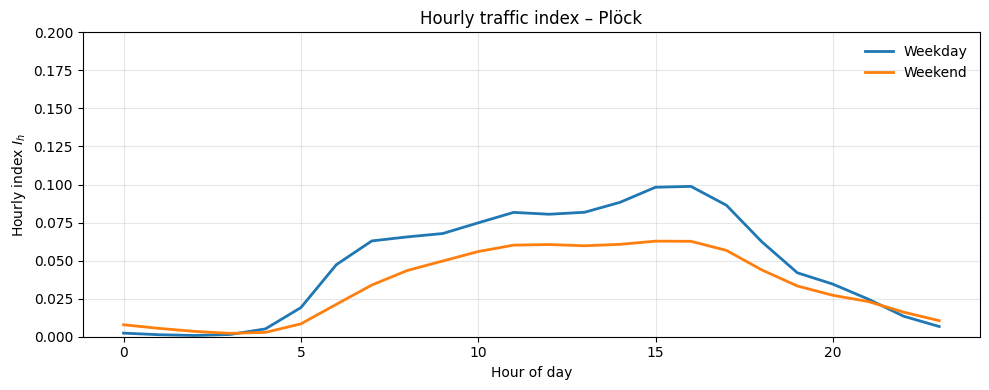

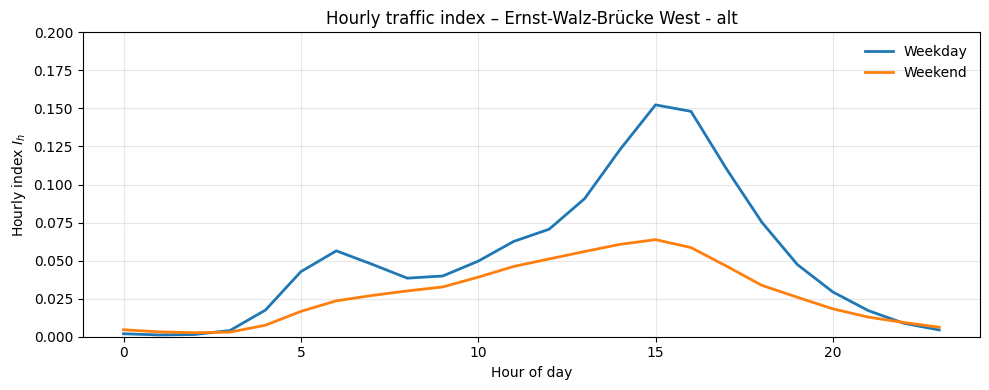

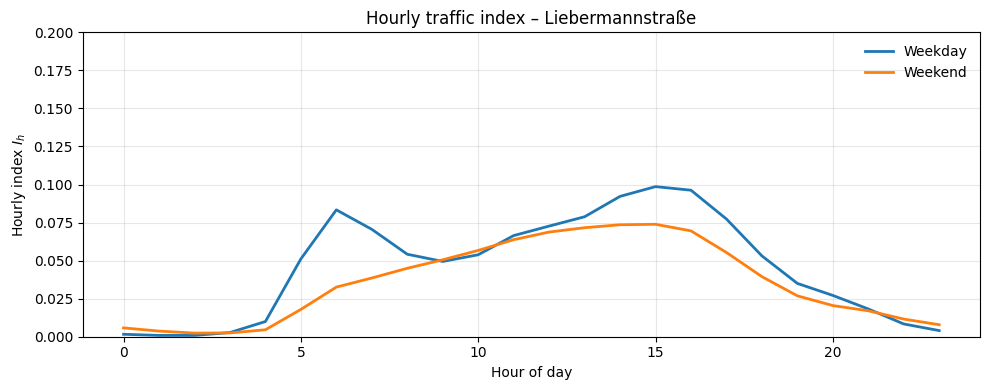

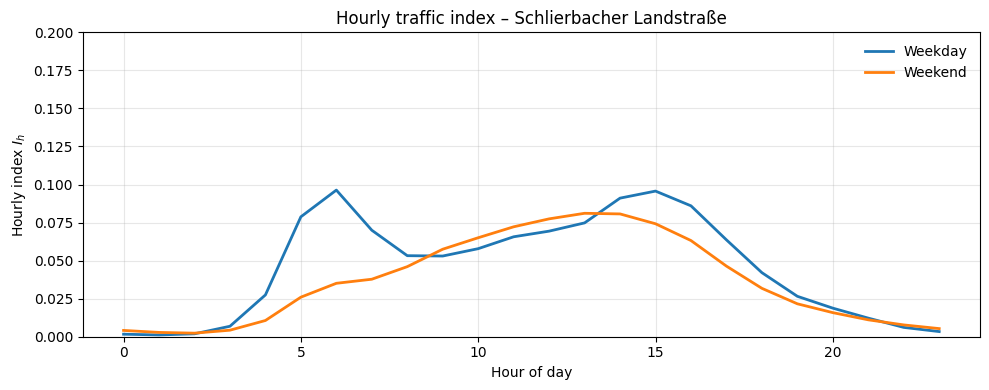

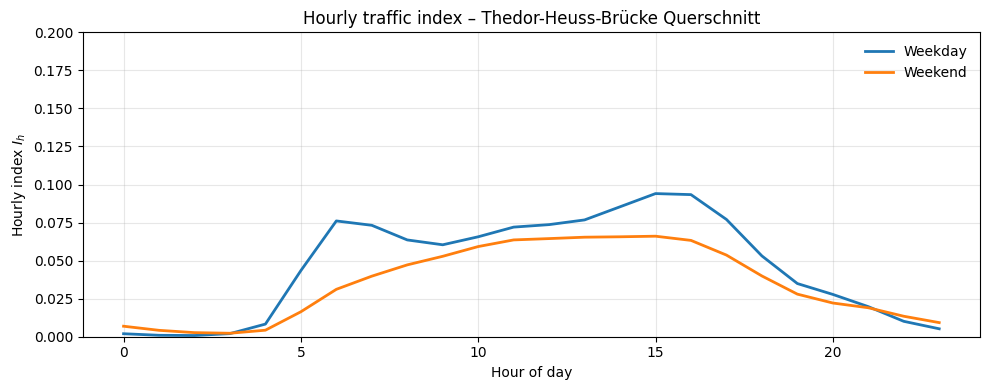

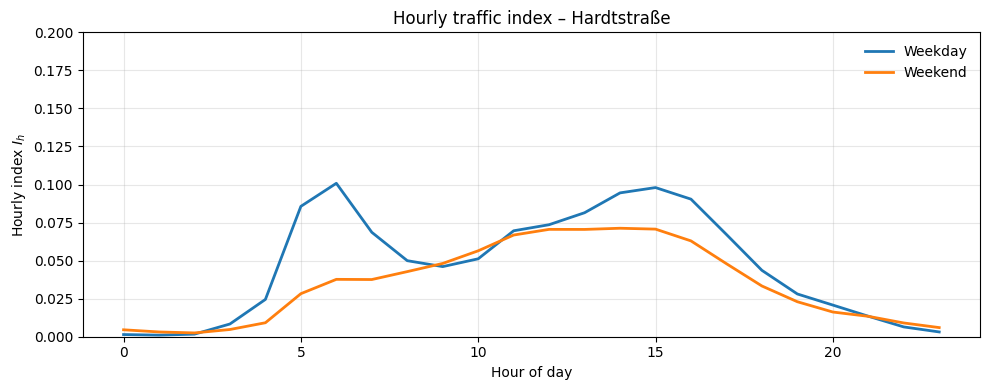

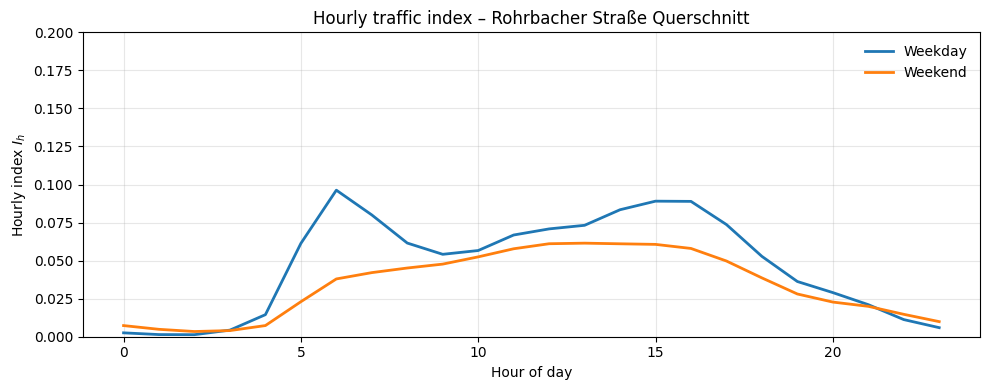

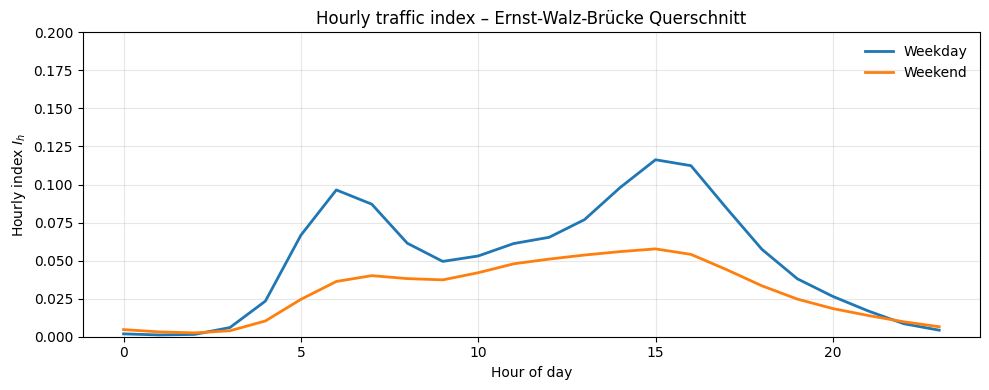

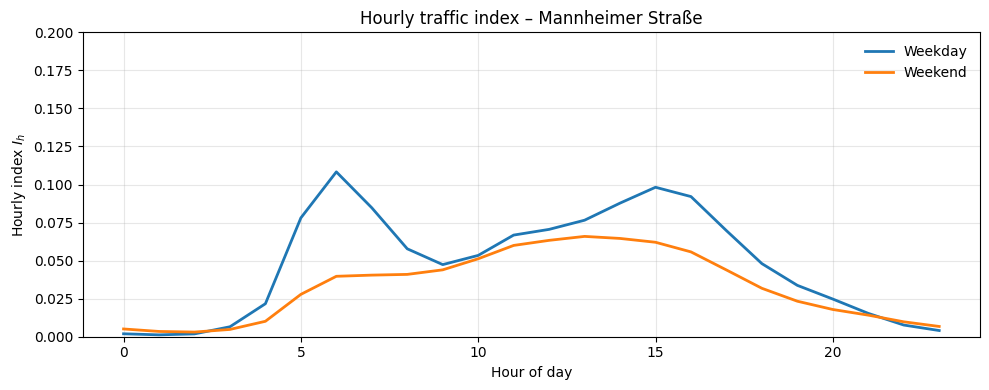

In [8]:
from analysis.visualization.characterisation.plotting import plot_hourly_indices

for station in dl.get_bicyle_stations():
  plot_hourly_indices(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), show_metrics=False)

**Daily Indices**

Daily indices show a clear reduction in traffic on weekends. However, the magnitude of this drop varies substantially between stations, potentially providing an additional discriminator between leisure-oriented and utilitarian-oriented usage.

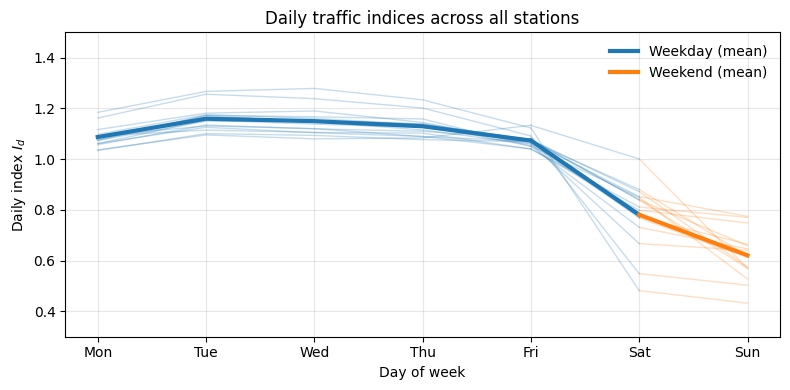

In [9]:
from analysis.visualization.characterisation.plotting import plot_daily_indices_all

plot_daily_indices_all(dl)

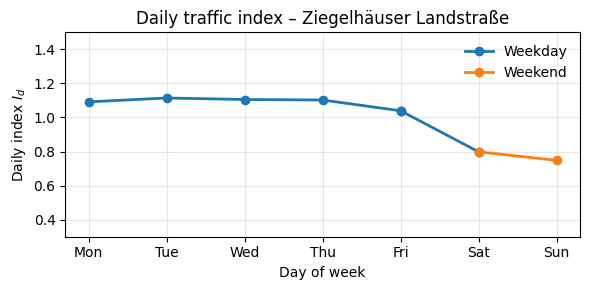

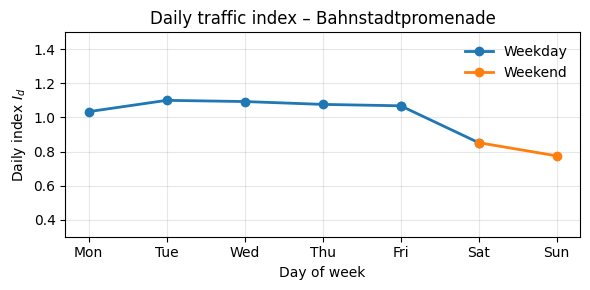

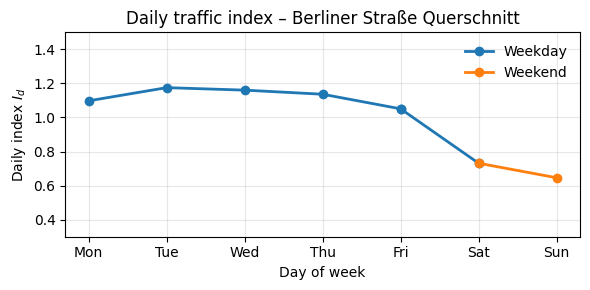

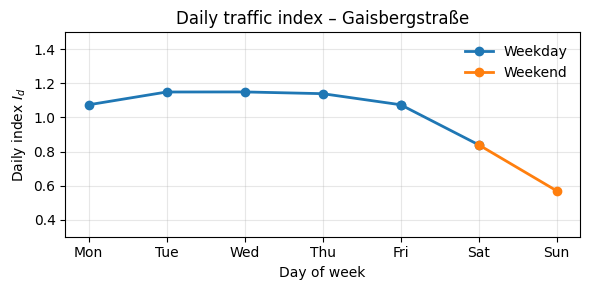

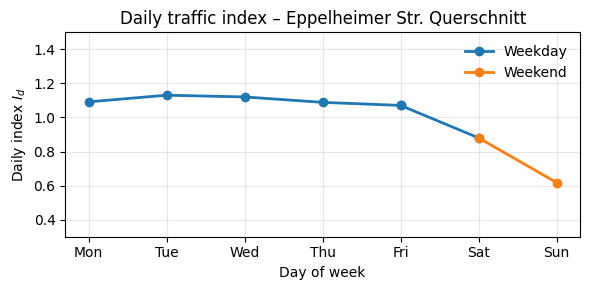

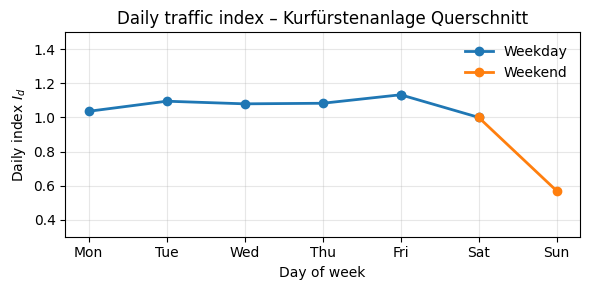

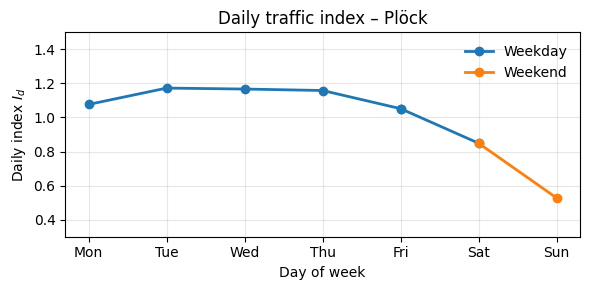

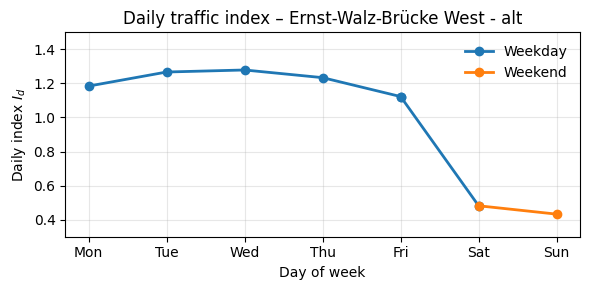

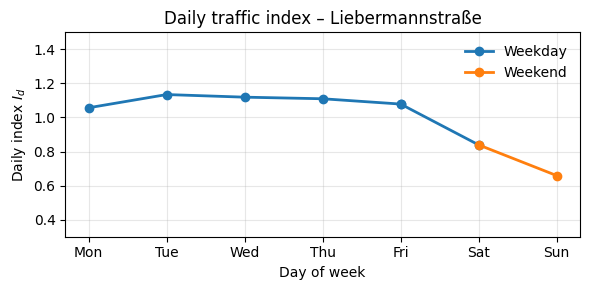

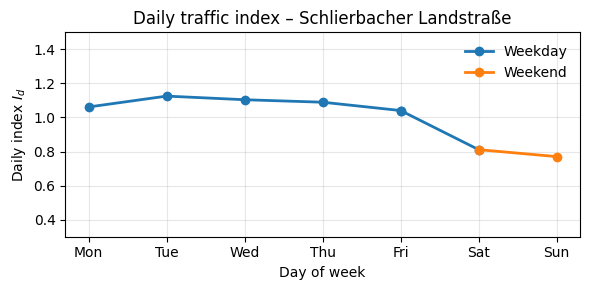

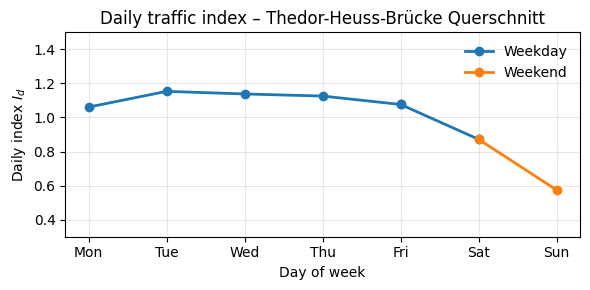

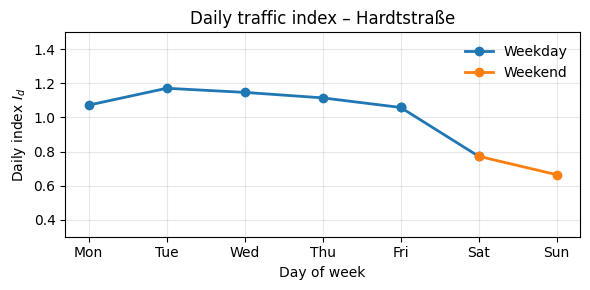

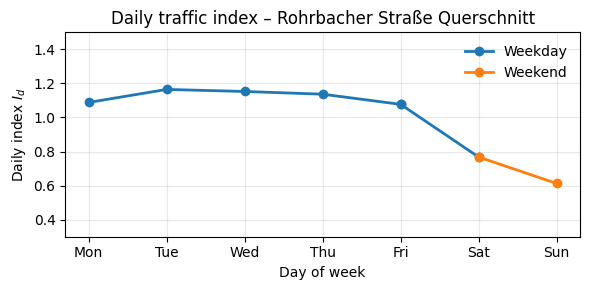

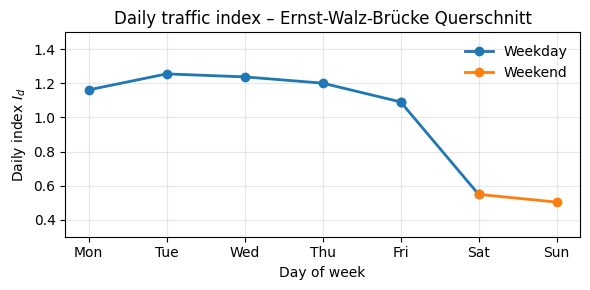

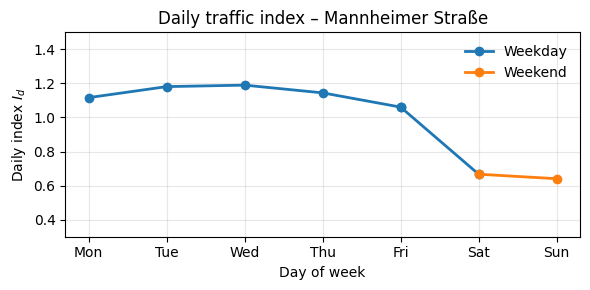

In [10]:
from analysis.visualization.characterisation.plotting import plot_daily_indices

for s in dl.get_bicyle_stations():
    plot_daily_indices(dl, s, ylim=(0.3,1.5), show_metric=False)

**Monthly Indices**

Monthly indices reveal clear differences in seasonality across stations. While all stations exhibit a noticeable reduction in usage during winter, some show an especially pronounced drop, which may indicate predominantly leisure-oriented usage. In contrast, other stations maintain relatively stable traffic levels throughout the year, consistent with mainly utilitarian travel patterns.

Notably, a pronounced decrease in traffic is observed in August, which may be explained by the summer holiday period, during which regular commuting activity is reduced.

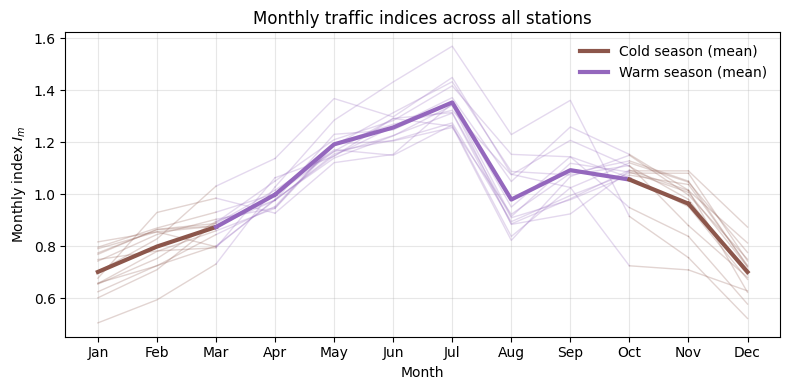

In [11]:
from analysis.visualization.characterisation.plotting import plot_monthly_indices_all

plot_monthly_indices_all(dl)

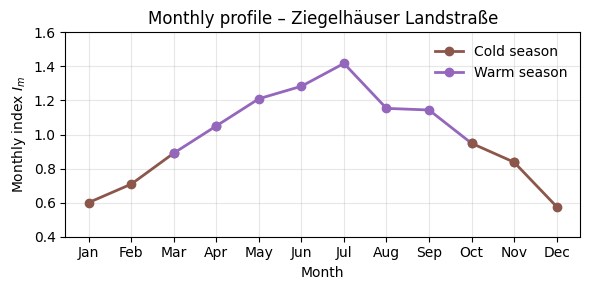

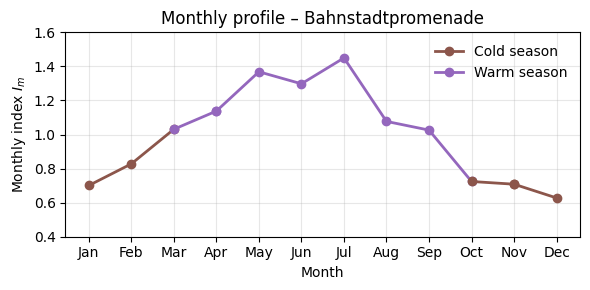

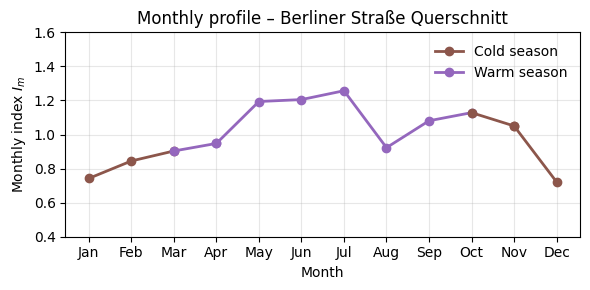

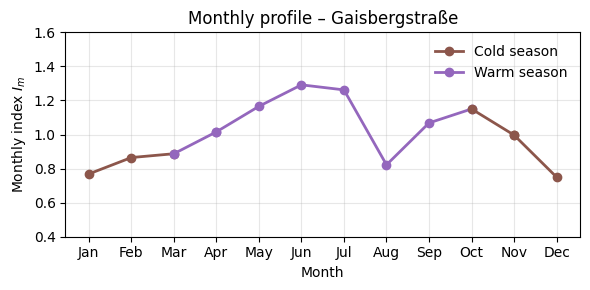

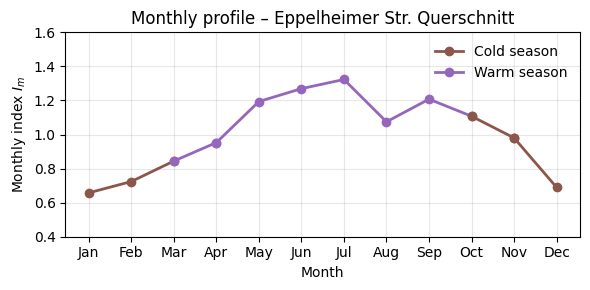

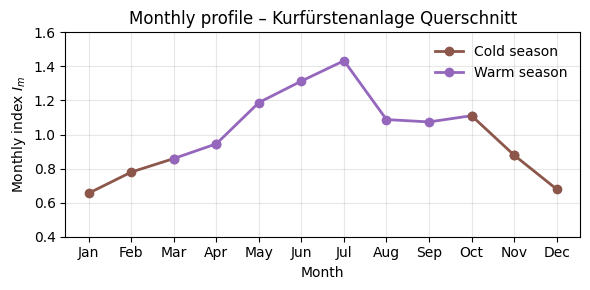

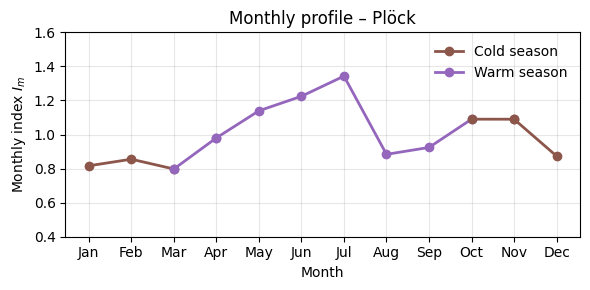

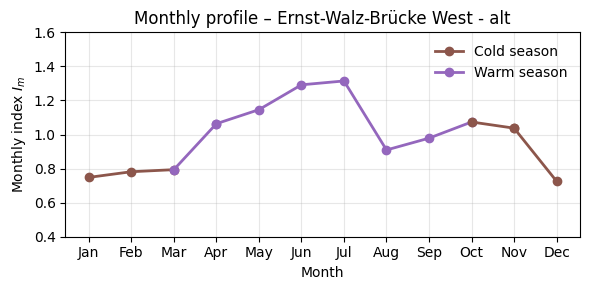

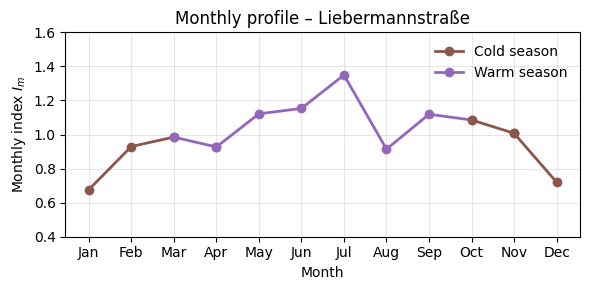

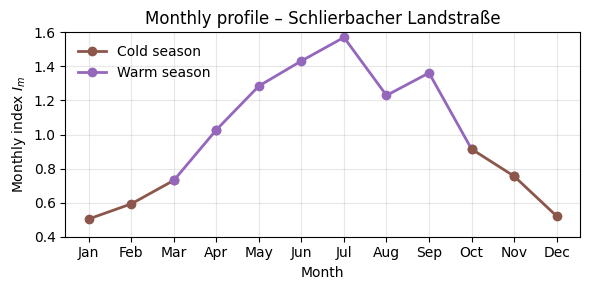

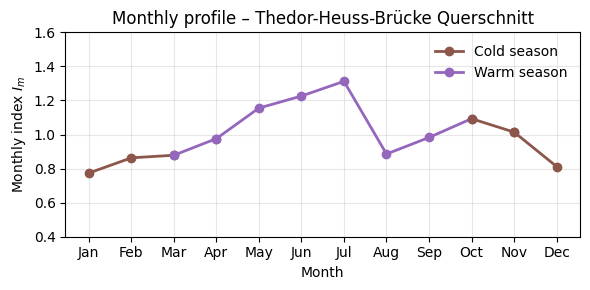

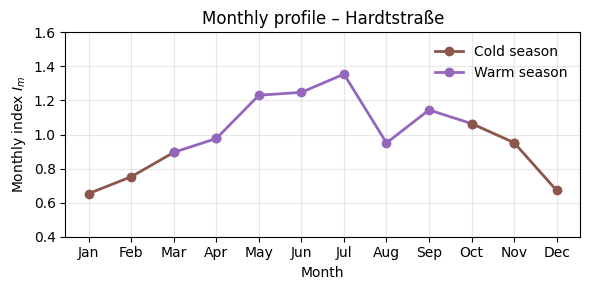

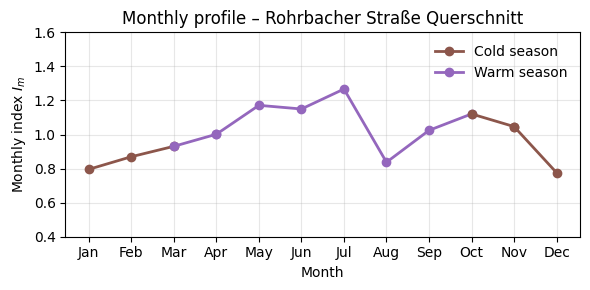

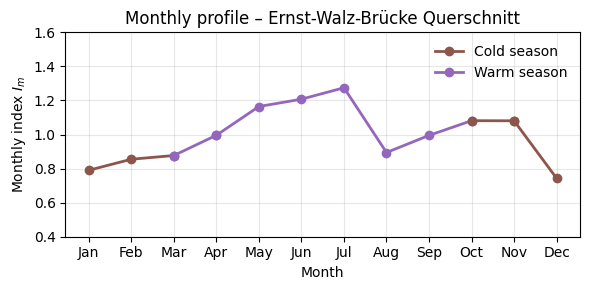

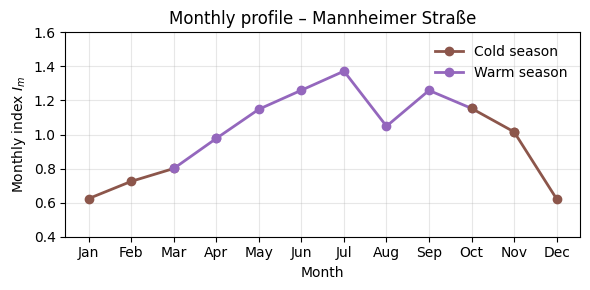

In [12]:
from analysis.visualization.characterisation.plotting import plot_monthly_indices

for s in dl.get_bicyle_stations():
    plot_monthly_indices(dl, s, ylim=(0.4, 1.6), show_metric=False)

## Feature Engineering

Building on the exploratory plots, we quantify the observed temporal patterns by defining a compact set of **discriminative features** that enable a systematic characterisation of station usage types.

In [13]:
from analysis.visualization.characterisation.features import build_feature_df

X = build_feature_df(dl)

### Double Peak Index (DPI):

Weekday hourly profiles of some stations exhibit a pronounced double-peak structure, typically associated with morning and evening commuting. The DPI quantifies this behaviour by identifying dominant morning (5–10 h) and evening (14–20 h) peaks and relating their magnitudes to the average midday level (8–14 h). Stations with clear and balanced commuting peaks yield high DPI values, whereas flat or single-peak profiles result in low scores.

Formally, let $p_m$ and $p_e$ denote the magnitudes of the morning and evening peaks at hours $h_m$ and $h_e$, and let $m$ be the average midday traffic level. The DPI is defined as

$$
\begin{align*}
\text{strength} &= \frac{(p_m - m) + (p_e - m)}{2} \\
\text{symmetry} &= 1 - \frac{|p_m - p_e|}{\max(p_m, p_e)} \\
\text{distance} &= \min\!\left(\frac{|h_e - h_m|}{10},\, 1\right) \\
\text{DPI} &= \max\!\left( \text{strength} \cdot \text{symmetry} \cdot \text{distance},\, 0 \right)
\end{align*}
$$

In [14]:
"""X_DPI = (
    X
    .select(["station", "DPI"])
    .sort("DPI", descending=True)
)

X_DPI"""

'X_DPI = (\n    X\n    .select(["station", "DPI"])\n    .sort("DPI", descending=True)\n)\n\nX_DPI'

### Weekend Shape Difference (WSD):

Differences between weekday and weekend hourly traffic patterns provide an additional discriminator between usage types. To capture this effect, we compare the *shape* of the weekday and weekend hourly profiles.

Let $\mathbf{p}^{wd}$ and $\mathbf{p}^{we}$ denote the weekday and weekend hourly profiles, normalised to sum to one. The Weekend Shape Difference is defined as

$$
\text{WSD} =
\left\lVert
\frac{\mathbf{p}^{wd}}{\sum_h p^{wd}_h}
-
\frac{\mathbf{p}^{we}}{\sum_h p^{we}_h}
\right\rVert_2
$$

High values indicate strong differences between weekday and weekend usage patterns, while low values suggest similar diurnal structures.

In [15]:
"""X_WSD = (
    X
    .select(["station", "WSD"])
    .sort("WSD", descending=True)
)

X_WSD"""

'X_WSD = (\n    X\n    .select(["station", "WSD"])\n    .sort("WSD", descending=True)\n)\n\nX_WSD'

### Seasonal Drop Index (SDI):

Seasonality provides a further discriminator between leisure-oriented and utilitarian-oriented stations. The SDI quantifies the relative drop between high-usage and low-usage months based on the monthly index.

Let $I_m$ denote the monthly index values of a station. Using upper and lower quantiles to ensure robustness, the Seasonal Drop Index is defined as

$$
\begin{align*}
q_{90} &= \text{quantile}_{0.9}(I_m) \\
q_{10} &= \text{quantile}_{0.1}(I_m) \\
\text{SDI} &= \frac{q_{90} - q_{10}}{q_{90}}
\end{align*}
$$

High SDI values indicate strong seasonal variation, while low values correspond to relatively stable, year-round usage.


In [16]:
"""X_SDI = (
    X
    .select(["station", "SDI"])
    .sort("SDI", descending=True)
)

X_SDI"""

'X_SDI = (\n    X\n    .select(["station", "SDI"])\n    .sort("SDI", descending=True)\n)\n\nX_SDI'

## Clustering using K-Means
To group stations based on their extracted features, we apply k-means clustering to the feature space spanned by DPI, WSD, and SDI. Prior to clustering, all features are standardised to ensure equal weighting.

The number of clusters is fixed to $k=3$:

In [17]:
N_CLUSTERS = 3

reflecting the conceptual distinction between **leisure-oriented**, **utilitarian-oriented**, and **mixed** usage types introduced earlier. Rather than optimising purely geometric separation metrics, this choice prioritises **interpretability** and alignment with the underlying traffic behaviour assumptions.

In [18]:
from analysis.visualization.characterisation.clustering import kmeans_clustering

features_full = build_feature_df(dl)

clustering = kmeans_clustering(features=features_full, k=N_CLUSTERS)

clustering.drop(["valid"])

station,DPI,WSD,SDI,cluster
str,f64,f64,f64,i32
"""Ziegelhäuser Landstraße""",0.030285,0.080479,0.531836,1
"""Bahnstadtpromenade""",0.033136,0.078063,0.487909,1
"""Berliner Straße Querschnitt""",0.009011,0.057259,0.384064,2
"""Gaisbergstraße""",0.023613,0.058057,0.39111,0
"""Eppelheimer Str. Querschnitt""",0.012655,0.05384,0.456739,2
"""Kurfürstenanlage Querschnitt""",0.003971,0.035088,0.482909,2
"""Plöck""",0.00381,0.031367,0.333331,2
"""Ernst-Walz-Brücke West - alt""",0.015245,0.066516,0.420705,0
"""Liebermannstraße""",0.021614,0.060639,0.375826,0


In [19]:



from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X_valid = X.filter(pl.col("valid") == True)
X_feat = X_valid.drop(["station", "valid"]).to_numpy()
X_scaled = StandardScaler().fit_transform(X_feat)

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init=20)
labels = kmeans.fit_predict(X_scaled)

X_valid = X_valid.with_columns(pl.Series("cluster", labels))

X = X.join(
    X_valid.select(["station", "cluster"]),
    on="station",
    how="left"
)

X.drop(["station", "valid"]).group_by("cluster").mean()

cluster,DPI,WSD,SDI
i32,f64,f64,f64
0,0.023627,0.060556,0.370806
1,0.031976,0.078684,0.524391
2,0.008275,0.045554,0.398901


### Feature discrimination across clusters

Before we continue let's check how much the features to discriminate between the clusters. To assess this we inspect their distributions using boxplots.

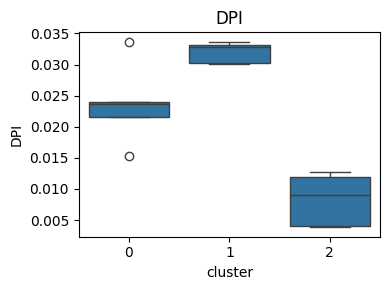

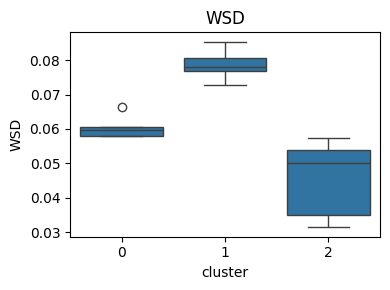

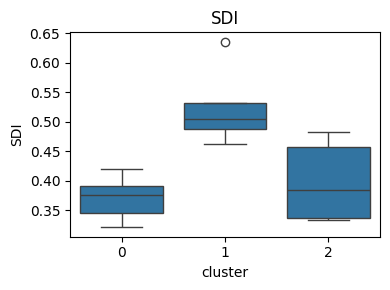

In [20]:
from analysis.visualization.characterisation.plotting import plot_feature_boxplots

EXCLUDE = {"station", "valid", "cluster", "date"}

FEATURES = [
    c for c in X.columns
    if c not in EXCLUDE and X[c].dtype in (pl.Float32, pl.Float64)
]

plot_feature_boxplots(
    X,
    features=FEATURES,
    cluster_col="cluster",
    clusters=(0, 1, 2)
)

**DPI:** shows clear separation between clusters, with one cluster exhibiting pronounced weekday double-peak structures typical of commuting traffic, while another cluster displays consistently low DPI values, indicating the absence of work-related patterns.

**WSD:** strongly differentiates the clusters, separating stations with substantial weekday–weekend contrasts from those with similar daily profiles throughout the week.

**SDI:** separation is less pronounced, it supports the distinction between clusters with stable year-round usage and those with stronger seasonal dependence.

### Feature correlation

In [21]:
X.select(FEATURES).corr()

DPI,WSD,SDI
f64,f64,f64
1.0,0.832245,0.386217
0.832245,1.0,0.634934
0.386217,0.634934,1.0


We observe a strong correlation between **DPI** and **WSD**.  
High **DPI** ⇒ pronounced weekday commuting peaks ⇒ strong structural differences between weekday and weekend profiles (absence of commuting peaks on weekends) ⇒ high **WSD**.

Although correlated, the features are not redundant: **DPI** captures the strength of commuting-related peak structure, while **WSD** quantifies the overall weekday–weekend shape difference. 

### PCA
Reducing the standardized feature space to two dimensions using PCA. This allows us to further explore the feature space 
Using the first two components the majority of variance is explained. 

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)

X_pca_pl = (
    X
    .with_columns([
        pl.Series("PC1", X_pca[:, 0]),
        pl.Series("PC2", X_pca[:, 1]),
    ])
)
X_pca_pl

Explained variance: [0.75108211 0.2107186 ]


station,DPI,WSD,SDI,valid,cluster,PC1,PC2
str,f64,f64,f64,bool,i32,f64,f64
"""Ziegelhäuser Landstraße""",0.030285,0.080479,0.531836,true,1,1.880492,0.319605
"""Bahnstadtpromenade""",0.033136,0.078063,0.487909,true,1,1.675032,-0.229423
"""Berliner Straße Querschnitt""",0.009011,0.057259,0.384064,true,2,-1.130838,0.237554
"""Gaisbergstraße""",0.023613,0.058057,0.39111,true,0,-0.260356,-0.476394
"""Eppelheimer Str. Querschnitt""",0.012655,0.05384,0.456739,true,2,-0.649852,0.765643
"""Kurfürstenanlage Querschnitt""",0.003971,0.035088,0.482909,true,2,-1.763197,1.634745
"""Plöck""",0.00381,0.031367,0.333331,true,2,-2.80932,0.25023
"""Ernst-Walz-Brücke West - alt""",0.015245,0.066516,0.420705,true,0,-0.183729,0.177328
"""Liebermannstraße""",0.021614,0.060639,0.375826,true,0,-0.349734,-0.537917


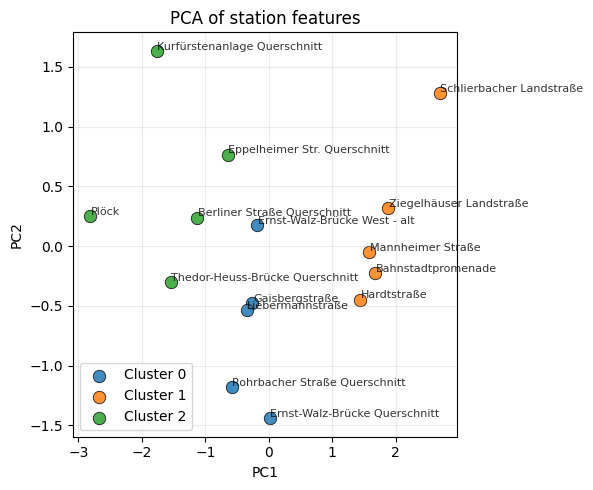

In [23]:
from analysis.visualization.characterisation.plotting import plot_pca_clusters

plot_pca_clusters(
    X_pca_pl,
    cluster_col="cluster",
    annotate=True
)

The projection reveals a clear separation of stations primarily along the first principal component (PC1). This axis reflects the contrast between stations with pronounced weekday commuting structure and those with more homogeneous, leisure-oriented traffic patterns. 

The second principal component (PC2) captures secondary variations, including differences in seasonal sensitivity and intermediate usage characteristics.

## Probabalistic Clustering using K-Means
So far, station usage types were derived from a single k-means clustering applied to features aggregated over the full observation period of each station.

However, the temporal coverage differs between stations, as shown below.

As a consequence, cluster assignments may depend on the chosen observation window. To assess the temporal robustness of the clustering, we recompute the feature vectors and cluster assignments for a restricted time interval.

In [24]:
rows = []

for station in dl.get_bicyle_stations():
    bd = dl.get_bicycle(station_name=station)
    min_date, max_date = bd.date_range()
    rows.append({
        "station": station,
        "start_date": min_date,
        "end_date": max_date,
    })

df_dates = pl.DataFrame(rows)

df_dates = df_dates.with_columns(
    (pl.col("end_date") - pl.col("start_date"))
        .dt.total_days()
        .alias("summed_days")
)

df_dates

station,start_date,end_date,summed_days
str,"datetime[μs, UTC]","datetime[μs, UTC]",i64
"""Ziegelhäuser Landstraße""",2019-01-31 23:00:00 UTC,2025-11-21 03:00:00 UTC,2485
"""Bahnstadtpromenade""",2020-01-31 23:00:00 UTC,2025-06-18 13:00:00 UTC,1964
"""Berliner Straße Querschnitt""",2020-01-31 23:00:00 UTC,2025-12-14 22:00:00 UTC,2143
"""Gaisbergstraße""",2015-10-31 23:00:00 UTC,2024-12-26 22:00:00 UTC,3343
"""Eppelheimer Str. Querschnitt""",2020-01-31 23:00:00 UTC,2025-12-14 22:00:00 UTC,2143
"""Kurfürstenanlage Querschnitt""",2019-01-31 23:00:00 UTC,2025-12-14 22:00:00 UTC,2508
"""Plöck""",2015-10-31 23:00:00 UTC,2025-12-14 22:00:00 UTC,3696
"""Ernst-Walz-Brücke West - alt""",2014-05-31 22:00:00 UTC,2018-10-10 21:00:00 UTC,1592
"""Liebermannstraße""",2018-10-10 22:00:00 UTC,2025-12-14 22:00:00 UTC,2622


### Temporal robustness check

We focus on the period 2021–2024, since all stations are continuously observed from 2021 onwards (excluding Ernst-Walz-Brücke West – alt, which was removed in 2018).
The resulting clustering is compared to the clustering obtained from the full data set.

Cluster consistency is quantified using the Adjusted Rand Index (ARI), which measures the agreement between two clusterings while correcting for chance agreement.

In [25]:
from analysis.visualization.characterisation.clustering import cluster_ari

interval_21_24 = ("2021-01-01", "2024-01-01")
features_21_24 = build_feature_df(dl, interval_21_24)

clustering_full = kmeans_clustering(features=features_full, k=N_CLUSTERS)
clustering_21_24 = kmeans_clustering(features=features_21_24, k=N_CLUSTERS)

score = cluster_ari(clustering_full, clustering_21_24)
print(f"Cluster Consistency Score: {score * 100:.2f}%")

Cluster Consistency Score: 78.46%


The ARI indicates that cluster assignments are sensitive to the selected time window.
This behaviour is expected, as traffic patterns may evolve over time and aggregated features depend on the available observation period.

Rather than interpreting this variability as a weakness of the feature set, it motivates a probabilistic interpretation of station usage types.

### Probabilistic station classification
Instead of assigning each station to a single fixed cluster, we repeatedly apply k-means clustering over an expanding (cumulative) time window and compute cluster membership probabilities.

For each station $s$ and usage type $u$, we define:

$$
\begin{align*}
P(\;u\;|\;s\;) = \frac{\text{Number of assignments of station s to type u}}{\text{Total number of clustering runs}}
\end{align*}
$$

#### Cumulative time series

To obtain a probabilistic and temporally robust station classification, k-means clustering is applied repeatedly over a sliding monthly time window.  
Each clustering run is performed on features computed from a fixed-length window (f.ex. 24 months), which is shifted forward month by month.

This can be seen in the cell below.

In [26]:
from analysis.visualization.characterisation.clustering import monthly_dates, make_interval

DATASET_START = "2016-01-01"
DATASET_END = "2024-01-01"
TIME_SERIES_MODE = "sliding"

dates = monthly_dates(start=DATASET_START, end=DATASET_END)
for d in dates:
  i = make_interval(start=DATASET_START, end=d, mode=TIME_SERIES_MODE, window_months=24)
  print(i)

('2014-01-01', '2016-01-01')
('2014-02-01', '2016-02-01')
('2014-03-01', '2016-03-01')
('2014-04-01', '2016-04-01')
('2014-05-01', '2016-05-01')
('2014-06-01', '2016-06-01')
('2014-07-01', '2016-07-01')
('2014-08-01', '2016-08-01')
('2014-09-01', '2016-09-01')
('2014-10-01', '2016-10-01')
('2014-11-01', '2016-11-01')
('2014-12-01', '2016-12-01')
('2015-01-01', '2017-01-01')
('2015-02-01', '2017-02-01')
('2015-03-01', '2017-03-01')
('2015-04-01', '2017-04-01')
('2015-05-01', '2017-05-01')
('2015-06-01', '2017-06-01')
('2015-07-01', '2017-07-01')
('2015-08-01', '2017-08-01')
('2015-09-01', '2017-09-01')
('2015-10-01', '2017-10-01')
('2015-11-01', '2017-11-01')
('2015-12-01', '2017-12-01')
('2016-01-01', '2018-01-01')
('2016-02-01', '2018-02-01')
('2016-03-01', '2018-03-01')
('2016-04-01', '2018-04-01')
('2016-05-01', '2018-05-01')
('2016-06-01', '2018-06-01')
('2016-07-01', '2018-07-01')
('2016-08-01', '2018-08-01')
('2016-09-01', '2018-09-01')
('2016-10-01', '2018-10-01')
('2016-11-01',

### Cluster Interpretation

K-means assigns arbitrary numeric cluster IDs without semantic meaning.  
To obtain interpretable usage types, clusters are labelled post hoc based on their aggregated feature characteristics.

For each cluster, mean feature values (DPI, WSD, SDI) are computed and standardised.

A scalar utilitarian score is defined as

$$
\text{Utilitarian Score} = \text{DPI} + \text{WSD} - \text{SDI}
$$

Clusters are ordered by this score and labelled as **recreational**, **mixed**, and **utilitarian** from low to high values.  
Labels are derived from the full-period feature representation.

In [27]:
from analysis.visualization.characterisation.clustering import cluster_timeseries_usage, usage_probabilities

WINDOW_MONTHS = 24

usage = cluster_timeseries_usage(
    loader=dl,
    k=N_CLUSTERS,
    features=FEATURES,
    start=DATASET_START,
    end=DATASET_END,
    mode=TIME_SERIES_MODE,
    window_months=WINDOW_MONTHS
)

usage_probs = usage_probabilities(usage).sort(["station", "probability"], descending=True)

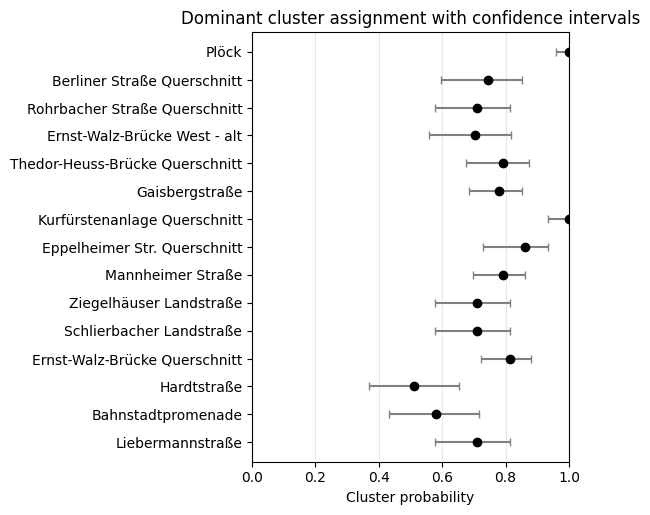

In [28]:
from analysis.visualization.characterisation.plotting import plot_cluster_probabilities_ci

plot_cluster_probabilities_ci(cluster_probs_ci=usage_probs, station_col="station", prob_col="probability", lo_col="ci_low", hi_col="ci_high")

In [29]:
top_per_usage_type = (
    usage_probs
    .sort("probability", descending=True)
    .group_by("usage_type")
    .head(20)  
)

top_per_usage_type

usage_type,station,k,N,probability,ci_low,ci_high
str,str,u32,u32,f64,f64,f64
"""recreational""","""Plöck""",91,91,1.0,0.959496,1.0
"""recreational""","""Kurfürstenanlage Querschnitt""",55,55,1.0,0.934715,1.0
"""recreational""","""Eppelheimer Str. Querschnitt""",37,43,0.860465,0.727364,0.934443
"""recreational""","""Thedor-Heuss-Brücke Querschnit…",49,62,0.790323,0.673608,0.87316
"""recreational""","""Berliner Straße Querschnitt""",32,43,0.744186,0.597616,0.850705
"""recreational""","""Gaisbergstraße""",1,91,0.010989,0.001942,0.059649
"""utilitarian""","""Ernst-Walz-Brücke Querschnitt""",74,91,0.813187,0.721041,0.879962
"""utilitarian""","""Gaisbergstraße""",71,91,0.78022,0.684761,0.852979
"""utilitarian""","""Rohrbacher Straße Querschnitt""",39,55,0.709091,0.578593,0.812288


### Map View of Clustering
Lets look how the clustering looks on a map.

In [30]:
from analysis.visualization.characterisation.map import (bicycle_station_cluster_map)
from IPython.display import display, clear_output

clear_output(wait=True)
display(bicycle_station_cluster_map(loader=dl, usage_probs=usage_probs))

## Impact of Public Holidays on Station Usage Patterns
To quantify the impact of public holidays on station usage patterns, we compare feature vectors computed from holiday periods with a baseline excluding holidays and analyse the resulting changes in the Double Peak Index (ΔDPI) and the Weekend Shape Difference (ΔWSD).


In [31]:

from analysis.visualization.characterisation.holiday import compute_holiday_deltas

delta_df = compute_holiday_deltas(loader=dl)

In [32]:
from analysis.visualization.characterisation.helpers import impact_by_usage, label_deltas_with_usage

delta_labeled = label_deltas_with_usage(delta_df=delta_df, usage_probs=usage_probs)
impact_holiday = impact_by_usage(delta_labeled=delta_labeled)

impact_holiday

usage_type,ΔDPI_median,ΔWSD_median
str,f64,f64
"""utilitarian""",-0.023186,-0.035146
"""mixed""",-0.030731,-0.050389
"""recreational""",-0.006301,-0.023331


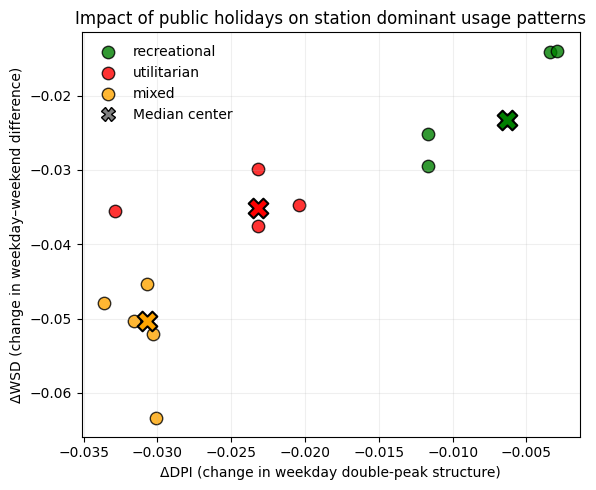

In [33]:
from analysis.visualization.characterisation.plotting import plot_holiday_impact

plot_holiday_impact(delta_labeled=delta_labeled)


Overall effects
- **ΔDPI < 0 for all stations:** Weekday morning and evening commuter peaks are weakened during public holidays.
- **ΔWSD < 0 for all stations:** Weekday traffic patterns become more similar to weekend profiles.

Mixed-use stations exhibit the largest absolute holiday-induced change in feature space

Recreational shows lowest change

## Impact of Weather on Station Usage Patterns

In [57]:
rainy = pl.col("precipitation") > 0.0
hot   = pl.col("temperature_2m") > 25
cold  = pl.col("temperature_2m") < 5
windy = pl.col("wind_speed_10m") > 6

wd = dl.get_weather(sample_rate="1d")

In [58]:
from analysis.visualization.characterisation.weather import compute_weather_deltas

rain_intervals = wd.get_intervals(rainy)
hot_intervals = wd.get_intervals(hot)
cold_intervals = wd.get_intervals(cold)
windy_intervals = wd.get_intervals(windy)


delta_rainy = compute_weather_deltas(loader=dl, event_intervals=rain_intervals, weekday=None, hours=None)
delta_hot = compute_weather_deltas(loader=dl, event_intervals=hot_intervals, weekday=None, hours=None)
delta_cold = compute_weather_deltas(loader=dl, event_intervals=cold_intervals, weekday=None, hours=None)
delta_windy = compute_weather_deltas(loader=dl, event_intervals=windy_intervals, weekday=None, hours=None)

delta_rainy_labeled = label_deltas_with_usage(delta_df=delta_rainy, usage_probs=usage_probs)
delta_hot_labeled = label_deltas_with_usage(delta_df=delta_hot, usage_probs=usage_probs)
delta_cold_labeled = label_deltas_with_usage(delta_df=delta_cold, usage_probs=usage_probs)
delta_windy_labeled = label_deltas_with_usage(delta_df=delta_windy, usage_probs=usage_probs)

In [59]:
DELTA_REL = "delta_relative"  
DELTA_ABS = "delta_absolute"  

impact_rain = (
    delta_rainy_labeled
    .group_by("usage_type")
    .agg([
        pl.len().alias("n_stations"),
        pl.median(DELTA_REL).alias("delta_median"),
        pl.mean(DELTA_REL).alias("delta_mean"),
        pl.quantile(DELTA_REL, 0.25).alias("q25"),
        pl.quantile(DELTA_REL, 0.75).alias("q75"),
    ])
    .sort("delta_median")
)

impact_hot = (
    delta_hot_labeled
    .group_by("usage_type")
    .agg([
        pl.len().alias("n_stations"),
        pl.median(DELTA_REL).alias("delta_median"),
        pl.mean(DELTA_REL).alias("delta_mean"),
        pl.quantile(DELTA_REL, 0.25).alias("q25"),
        pl.quantile(DELTA_REL, 0.75).alias("q75"),
    ])
    .sort("delta_median")
)

impact_cold = (
    delta_cold_labeled
    .group_by("usage_type")
    .agg([
        pl.len().alias("n_stations"),
        pl.median(DELTA_REL).alias("delta_median"),
        pl.mean(DELTA_REL).alias("delta_mean"),
        pl.quantile(DELTA_REL, 0.25).alias("q25"),
        pl.quantile(DELTA_REL, 0.75).alias("q75"),
    ])
    .sort("delta_median")
)

impact_windy = (
    delta_windy_labeled
    .group_by("usage_type")
    .agg([
        pl.len().alias("n_stations"),
        pl.median(DELTA_REL).alias("delta_median"),
        pl.mean(DELTA_REL).alias("delta_mean"),
        pl.quantile(DELTA_REL, 0.25).alias("q25"),
        pl.quantile(DELTA_REL, 0.75).alias("q75"),
    ])
    .sort("delta_median")
)

In [60]:
impact_rain

usage_type,n_stations,delta_median,delta_mean,q25,q75
str,u32,f64,f64,f64,f64
"""mixed""",5,-0.262965,-0.238838,-0.272613,-0.192418
"""utilitarian""",5,-0.151049,-0.175601,-0.179914,-0.13627
"""recreational""",5,-0.140338,-0.157785,-0.14505,-0.132878


In [61]:
impact_hot

usage_type,n_stations,delta_median,delta_mean,q25,q75
str,u32,f64,f64,f64,f64
"""recreational""",5,0.079653,0.122203,0.039736,0.224569
"""utilitarian""",5,0.189563,0.202547,0.143257,0.2449
"""mixed""",5,0.392641,0.316615,0.145776,0.467011


In [62]:
impact_cold

usage_type,n_stations,delta_median,delta_mean,q25,q75
str,u32,f64,f64,f64,f64
"""mixed""",5,-0.341087,-0.37435,-0.390469,-0.336241
"""recreational""",5,-0.25999,-0.251884,-0.288366,-0.195186
"""utilitarian""",5,-0.229673,-0.213056,-0.241787,-0.210384


In [63]:
impact_windy

usage_type,n_stations,delta_median,delta_mean,q25,q75
str,u32,f64,f64,f64,f64
"""mixed""",5,-0.168767,-0.122077,-0.17824,-0.098463
"""utilitarian""",5,-0.09474,-0.107969,-0.169721,-0.075838
"""recreational""",5,-0.055452,-0.0838,-0.082532,-0.039281


## Result: Same effect sequence as with public holidays

### mixed > utilitarian > recreational